chisq first order = 8.25153611783541,	ndof = 7
chisq second order = 6.842115296038535,	ndof = 6
chisq third order = 3.747761582200386,	ndof = 5


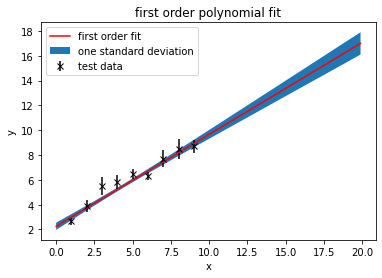

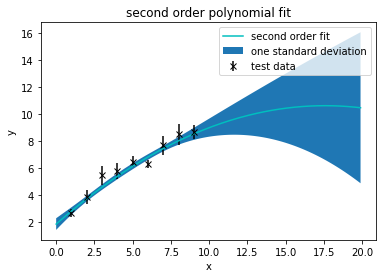

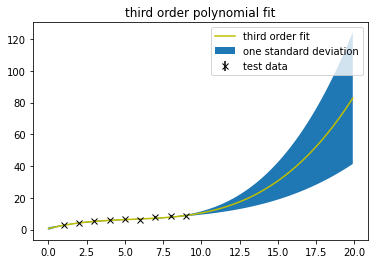

In [45]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt

## Input data arrays
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y = np.array([2.7, 3.9, 5.5, 5.8, 6.5, 6.3, 7.7, 8.5, 8.7])
sig = np.array([0.3, 0.5, 0.7, 0.6, 0.4, 0.3, 0.7, 0.8, 0.5])

## Polynomial function
def polynomial(x, *theta): return sum([theta[i]*x**i for i in range(len(theta))])
    
## First order
p0_first = np.array([1.0, 1.0])
theta_hat_first, covariance_first = curve_fit(polynomial, x, y, p0_first, sig, absolute_sigma=True)

## Second order
p0_second = np.array([1.0, 1.0, 1.0])
theta_hat_second, covariance_second =  curve_fit(polynomial, x, y, p0_second, sig, absolute_sigma=True)

## Third order
p0_third = np.array([1.0, 1.0, 1.0, 1.0])
theta_hat_third, covariance_third =  curve_fit(polynomial, x, y, p0_third, sig, absolute_sigma=True)

## Fitting
def fit(x, theta): return sum([theta[i]*x**i for i in range(len(theta)) ])

## Standard Deviation
def std_dev(x, cov): return sum([(x**(i+j))*cov[i][j] for i in range(len(cov)) for j in range(len(cov))])

## Create plots
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title('first order polynomial fit')
ax2 = fig2.add_subplot()
ax2.set_title('second order polynomial fit')
ax3 = fig3.add_subplot()
ax3.set_title('third order polynomial fit')
ax1.set_ylabel("y")
ax2.set_ylabel("y")
ax3.set_ylabel("y")
ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax3.set_xlabel("x")

x_val = np.arange(0, 20, 0.1)

## Plot given data with sigma error bars
ax1.errorbar(x, y, yerr=sig, fmt='kx', label="test data")
ax2.errorbar(x, y, yerr=sig, fmt='kx', label="test data")
ax3.errorbar(x, y, yerr=sig, fmt='kx', label="test data")

## Plot the three fits
ax1.plot(x_val, fit(x_val, theta_hat_first), 'r', label="first order fit")
ax1.fill_between(x_val, fit(x_val, theta_hat_first)-np.sqrt(std_dev(x_val, covariance_first)), fit(x_val, theta_hat_first)+np.sqrt(std_dev(x_val, covariance_first)), label="one standard deviation")
ax1.legend()

ax2.plot(x_val, fit(x_val, theta_hat_second), 'c', label="second order fit")
ax2.fill_between(x_val, fit(x_val, theta_hat_second)-np.sqrt(std_dev(x_val, covariance_second)), fit(x_val, theta_hat_second)+np.sqrt(std_dev(x_val, covariance_second)), label="one standard deviation")
ax2.legend()

ax3.plot(x_val, fit(x_val, theta_hat_third), 'y', label="third order fit")
ax3.fill_between(x_val, fit(x_val, theta_hat_third)-np.sqrt(std_dev(x_val, covariance_third)), fit(x_val, theta_hat_third)+np.sqrt(std_dev(x_val, covariance_third)), label="one standard deviation")
ax3.legend()


## Chisq
print (f"chisq first order = {sum(((y - polynomial(x, *theta_hat_first))/sig)**2)},\tndof = {len(x) - len(p0_first)}")
print (f"chisq second order = {sum(((y - polynomial(x, *theta_hat_second))/sig)**2)},\tndof = {len(x) - len(p0_second)}")
print (f"chisq third order = {sum(((y - polynomial(x, *theta_hat_third))/sig)**2)},\tndof = {len(x) - len(p0_third)}")